# RGI04 (Arctic Canada South)

F. Maussion & S. Galos

Curently: equivalent to RGI6

But we expect a full replace by Philipp and Frank. Until they submit, RGI6 is reproduced.

In [1]:
import pandas as pd
import geopandas as gpd
import subprocess
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from utils import mkdir, submission_summary, needs_size_filter, size_filter, plot_map, plot_date_hist
import os

## Files and storage paths

In [2]:
# Region of interest
reg = 4

# go down from rgi7_scripts/workflow
data_dir = '../../rgi7_data/'

# Level 2 GLIMS files
l2_dir = os.path.join(data_dir, 'l2_sel_reg_tars')

# Output directories
output_dir = mkdir(os.path.join(data_dir, 'l3_rgi7a'))
output_dir_tar = mkdir(os.path.join(data_dir, 'l3_rgi7a_tar'))

# RGI v6 file for comparison later 
rgi6_reg_file = os.path.join(data_dir, 'l0_RGIv6', '04_rgi60_ArcticCanadaNorth.zip')

### Load the input data

In [3]:
# Read L2 files
shp = gpd.read_file('tar://' + l2_dir + f'/RGI{reg:02d}.tar.gz/RGI{reg:02d}/RGI{reg:02d}.shp')

### List of submissions 

In [4]:
sdf, _ = submission_summary(shp)
sdf

,N,A,analysts,submitters,release_date,geog_area,src_date_mode,src_date_min,src_date_max
subm_id,,,,,,,,,
589,7408,40784.7,"Barrand, Burgess, Cawkwell, Copland, Filbert, ...",Bolch,2015,Randolph Glacier Inventory; Umbrella RC for me...,2000,1958,2010
745,7,103.6,"Barrand, Burgess, Cawkwell, Copland, Filbert, ...",Bolch,2021,Randolph Glacier Inventory; Umbrella RC for me...,2002,2002,2002


Notes based on individual submission evaluations: 

- 589: This is the RGI
- 745: also RGI, corrected: for https://github.com/GLIMS-RGI/rgi7_scripts/issues/8

In [5]:
# # Write out selection in intermediate shape files for manual GIS review
# tmp_output_dir = mkdir(os.path.join(data_dir, 'l0_tmp_data', f'rgi{reg:02d}_inventories'))
# tmp_output_dir_tar = mkdir(os.path.join(data_dir, 'l0_tmp_data'))
# for subid in shp.subm_id.unique():
#     s_loc = shp.loc[shp.subm_id == subid]
#     s_loc.to_file(tmp_output_dir + f'/subm_{int(subid):03d}.shp')
# print('Taring...')
# print(subprocess.run(['tar', '-zcvf', f'{tmp_output_dir_tar}/rgi{reg:02d}_inventories.tar.gz', '-C', 
#                       os.path.join(data_dir, 'l0_tmp_data'), f'rgi{reg:02d}_inventories']))

### Apply selection criteria to create the RGI7 data subset

In [6]:
rgi7 = shp.loc[shp['subm_id'].isin([589, 745])].copy()
print(needs_size_filter(rgi7))

False


### Some sanity checks 

In [7]:
sdf, df_class = submission_summary(rgi7)
df_class

,N,N NA
subm_id,,
589,7408,7408
745,7,7


In [8]:
# Nothing should change here
rgi7['is_rgi6'] = True

In [9]:
# Check the orphaned rock outcrops
orphan_f = os.path.join(data_dir, 'l1_orphan_interiors', f'RGI{reg:02d}', f'RGI{reg:02d}.shp')
if os.path.exists(orphan_f):
    orphan_f = gpd.read_file(orphan_f)
    if np.any(np.isin(rgi7.subm_id.unique(), orphan_f.subm_id.unique())):
        print('Orphan rock outcrops detected.')

### Plots 

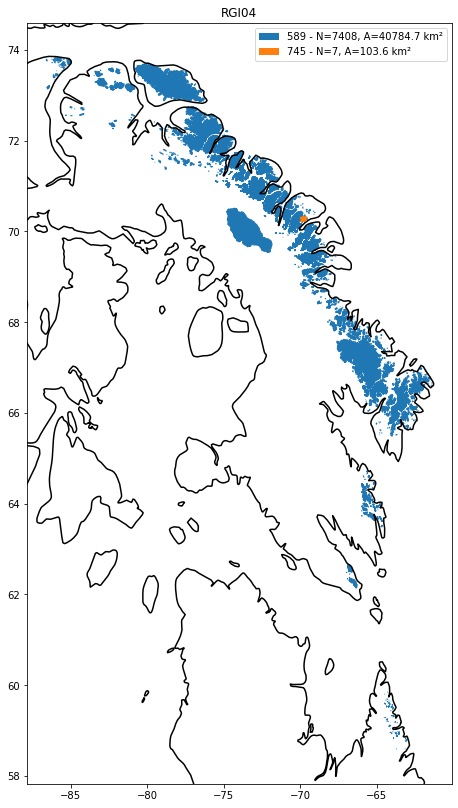

In [10]:
plot_map(rgi7, reg)

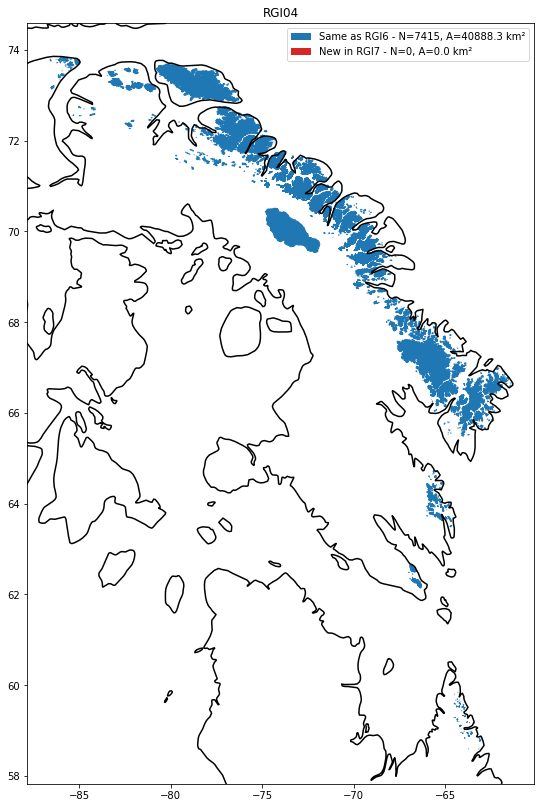

In [11]:
plot_map(rgi7, reg, is_rgi6=True)

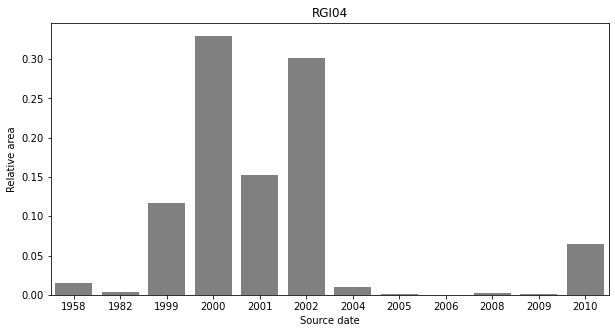

In [12]:
plot_date_hist(rgi7, reg)

### Text for github

In [13]:
fgh = sdf.T
fgh

subm_id,589,745
N,7408,7
A,40784.7,103.6
analysts,"Barrand, Burgess, Cawkwell, Copland, Filbert, ...","Barrand, Burgess, Cawkwell, Copland, Filbert, ..."
submitters,Bolch,Bolch
release_date,2015,2021
geog_area,Randolph Glacier Inventory; Umbrella RC for me...,Randolph Glacier Inventory; Umbrella RC for me...
src_date_mode,2000,2002
src_date_min,1958,2002
src_date_max,2010,2002


In [14]:
print(fgh.to_markdown(headers=np.append(['subm_id'], fgh.columns)))

| subm_id       | 589                                                                                                     | 745                                                                                                     |
|:--------------|:--------------------------------------------------------------------------------------------------------|:--------------------------------------------------------------------------------------------------------|
| N             | 7408                                                                                                    | 7                                                                                                       |
| A             | 40784.7                                                                                                 | 103.6                                                                                                   |
| analysts      | Barrand, Burgess, Cawkwell, Copland, Filbert, Gardner, Hartman

## Write out and tar 

In [15]:
dd = mkdir(f'{output_dir}/RGI{reg:02d}/', reset=True)

print('Writing...')
rgi7.to_file(dd + f'RGI{reg:02d}.shp')

print('Taring...')
print(subprocess.run(['tar', '-zcvf', f'{output_dir_tar}/RGI{reg:02d}.tar.gz', '-C', output_dir, f'RGI{reg:02d}']))

Writing...
Taring...
CompletedProcess(args=['tar', '-zcvf', '../../rgi7_data/l3_rgi7a_tar/RGI04.tar.gz', '-C', '../../rgi7_data/l3_rgi7a', 'RGI04'], returncode=0)


## Consistency check with RGI6 

In [16]:
# Just to know the name of the file to open from zip
import zipfile
with zipfile.ZipFile(rgi6_reg_file, "r") as z:
    for f in z.filelist:
        if 'shp' in f.filename:
            fn = f.filename
rgi6 = gpd.read_file('zip://' + rgi6_reg_file + '/' + fn)

In [17]:
len(rgi7), len(rgi6)

(7415, 7415)

Test the areas:

In [18]:
rgi6['Area_us'] = rgi6.to_crs({'proj':'cea'}).area 
rgi7['area'] = rgi7.to_crs({'proj':'cea'}).area 

In [19]:
print('Area RGI7a (km2)', rgi7['area'].sum() * 1e-6)
print('Area RGI6 (km2)', rgi6['Area'].sum())
print('Area RGI6 computed by us (km2)', rgi6['Area_us'].sum() * 1e-6)
print('diff areas RGI6 - RGI7 computed by us (km2)', (rgi6['Area_us'].sum() - rgi7['area'].sum()) * 1e-6)

Area RGI7a (km2) 40888.28362716354
Area RGI6 (km2) 40888.228
Area RGI6 computed by us (km2) 40888.286666425425
diff areas RGI6 - RGI7 computed by us (km2) 0.0030392618865966795
